## Advanced house price prediction:
    Dataset are taken from the kaggle competition

#### Importing neccessary packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

# warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_columns=81

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(f"Train data shape: {train.shape}")
print(f"Test data shape: {test.shape}")
print(f"Submission data shape: {submission.shape}")

Train data shape: (1460, 81)
Test data shape: (1459, 80)
Submission data shape: (1459, 2)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# total number of features
print(f'Count of All features: {len(train.columns)}')
print(f"Total Features are: {train.columns}")

Count of All features: 81
Total Features are: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 

#### Types of Feature:

In [5]:
numerical_feature = {feature for feature in train.columns if train[feature].dtypes != 'O'}
print(f"Count : {len(numerical_feature)}")
print(f"Numerical features are : {numerical_feature}")

Count : 38
Numerical features are : {'YrSold', 'HalfBath', 'LotArea', 'KitchenAbvGr', 'OpenPorchSF', 'ScreenPorch', 'FullBath', 'TotRmsAbvGrd', 'GrLivArea', 'MoSold', 'WoodDeckSF', 'OverallCond', 'BsmtHalfBath', 'BsmtFinSF2', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSSubClass', 'BsmtFinSF1', 'BedroomAbvGr', 'MasVnrArea', 'LowQualFinSF', '3SsnPorch', 'EnclosedPorch', '1stFlrSF', 'PoolArea', 'YearRemodAdd', 'TotalBsmtSF', 'MiscVal', 'YearBuilt', '2ndFlrSF', 'SalePrice', 'BsmtFullBath', 'LotFrontage', 'OverallQual', 'BsmtUnfSF', 'Id'}


In [6]:
discrete_feature = {feature for feature in numerical_feature if len(train[feature].unique())<=25}
print(f"Count : {len(discrete_feature)}")
print(f"Discrete features are : {discrete_feature}")

Count : 18
Discrete features are : {'MoSold', 'YrSold', 'LowQualFinSF', 'HalfBath', 'OverallCond', 'KitchenAbvGr', 'BsmtHalfBath', 'Fireplaces', '3SsnPorch', 'BsmtFullBath', 'FullBath', 'GarageCars', 'PoolArea', 'OverallQual', 'TotRmsAbvGrd', 'MSSubClass', 'MiscVal', 'BedroomAbvGr'}


In [7]:
continuous_feature = {feature for feature in numerical_feature if feature not in discrete_feature}
print(f"Count : {len(continuous_feature)}")
print(f"Continuous features are : {continuous_feature}")

Count : 20
Continuous features are : {'LotArea', 'ScreenPorch', 'OpenPorchSF', 'GrLivArea', 'WoodDeckSF', 'BsmtFinSF2', 'GarageYrBlt', 'GarageArea', 'BsmtFinSF1', 'MasVnrArea', 'EnclosedPorch', '1stFlrSF', 'YearRemodAdd', 'TotalBsmtSF', 'YearBuilt', '2ndFlrSF', 'SalePrice', 'LotFrontage', 'BsmtUnfSF', 'Id'}


In [8]:
categorical_feature = {feature for feature in train.columns if feature not in numerical_feature}
print(f"Count : {len(categorical_feature)}")
print(f"Categorical features are : {categorical_feature}")

Count : 43
Categorical features are : {'GarageQual', 'Neighborhood', 'Electrical', 'GarageFinish', 'CentralAir', 'LotConfig', 'Foundation', 'GarageType', 'LandContour', 'LandSlope', 'Heating', 'RoofStyle', 'BsmtCond', 'BsmtFinType1', 'ExterCond', 'HouseStyle', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Fence', 'PoolQC', 'Exterior1st', 'MSZoning', 'Functional', 'Street', 'Condition2', 'MasVnrType', 'Condition1', 'Exterior2nd', 'BsmtExposure', 'Utilities', 'MiscFeature', 'SaleType', 'BldgType', 'Alley', 'PavedDrive', 'LotShape', 'RoofMatl', 'FireplaceQu', 'GarageCond', 'SaleCondition', 'ExterQual', 'BsmtQual'}


#### STEP 1: EDA

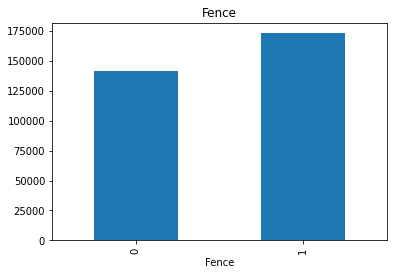

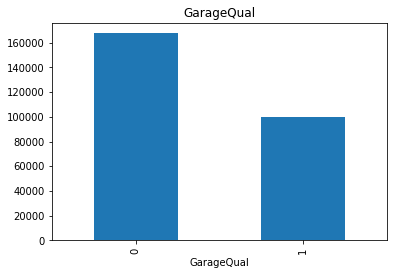

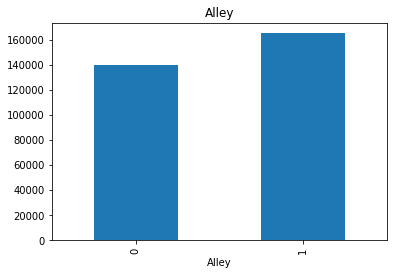

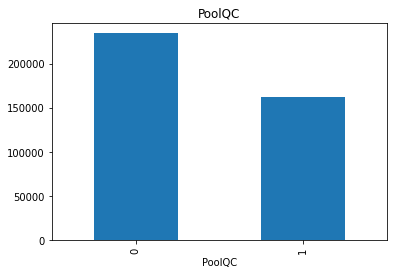

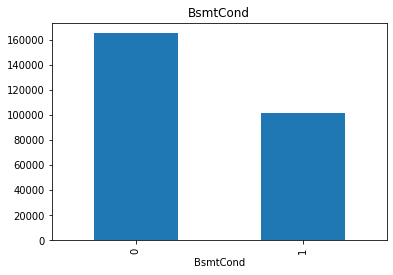

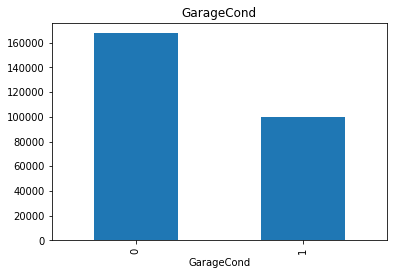

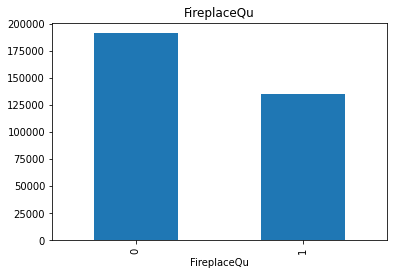

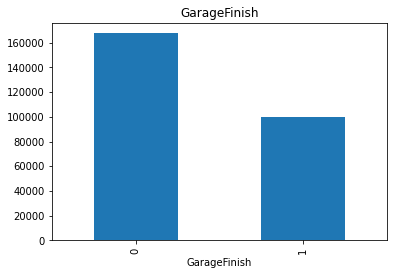

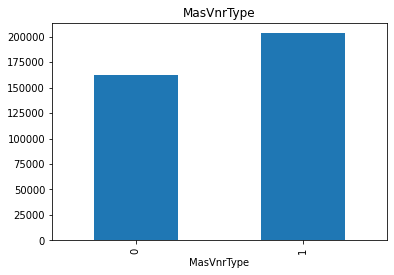

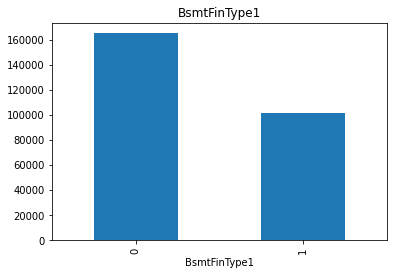

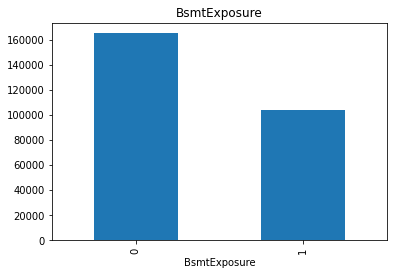

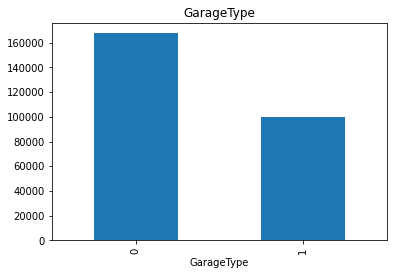

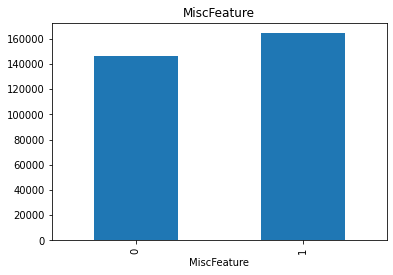

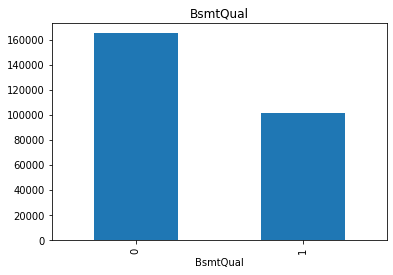

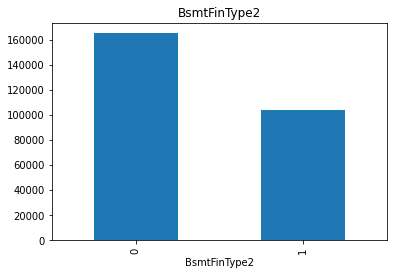

In [9]:
# Finding the relationship between the categorical feature with target feature
missing_value = {feature for feature in categorical_feature if train[feature].isnull().sum()>1}

for feature in missing_value:
    data = train.copy()
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(),1, 0)
    # let's calculate the mean SalePrice where the information is missing or present    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

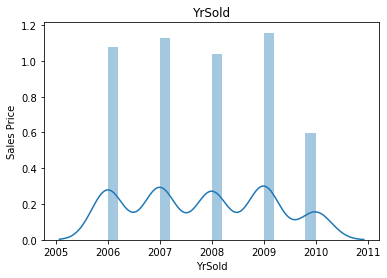

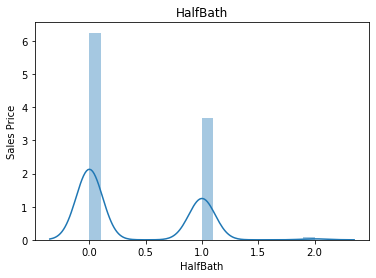

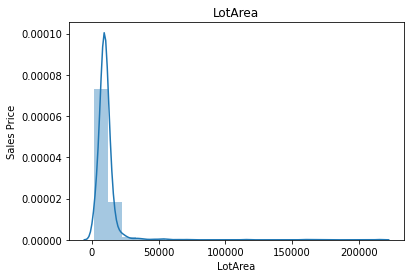

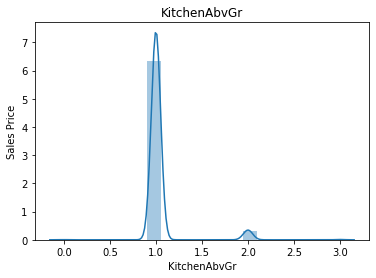

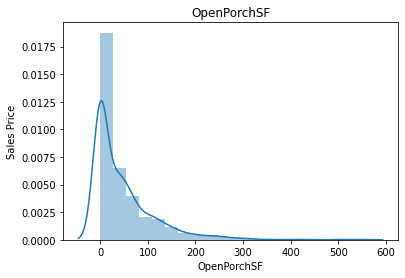

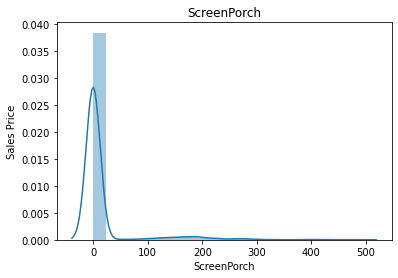

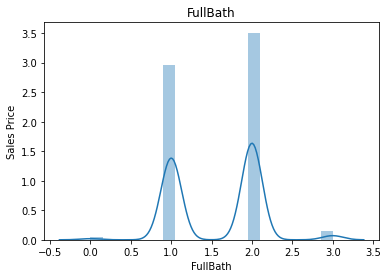

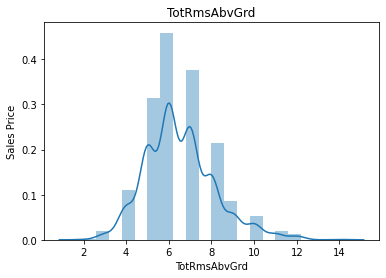

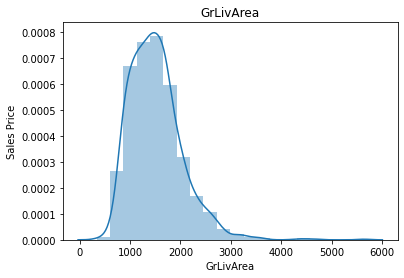

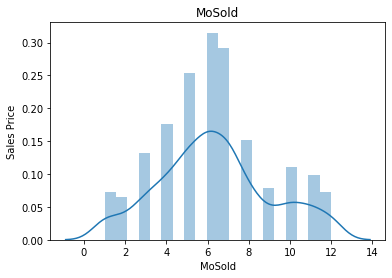

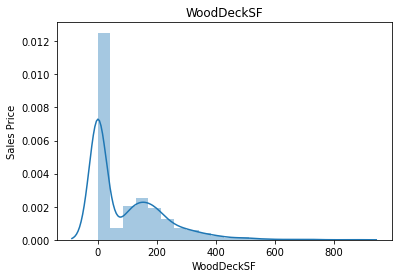

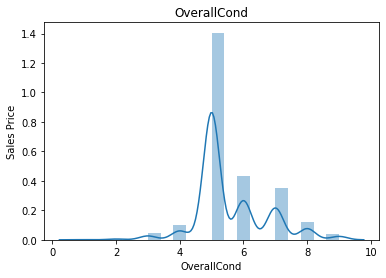

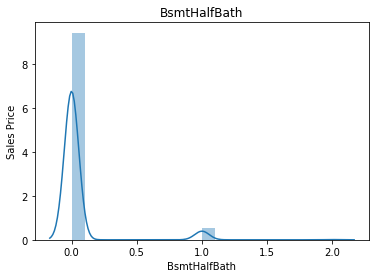

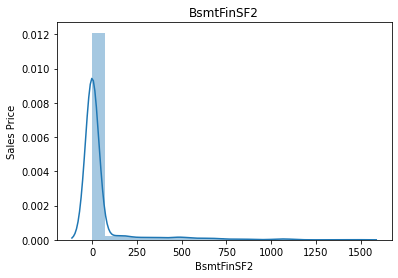

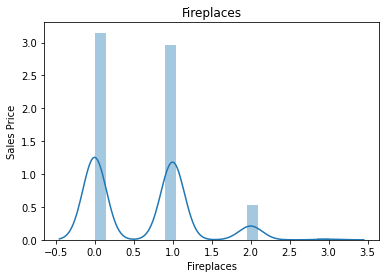

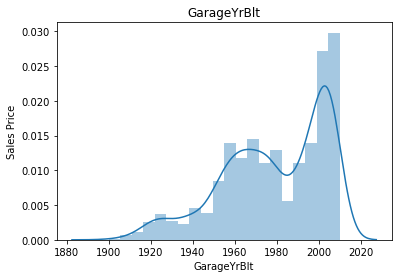

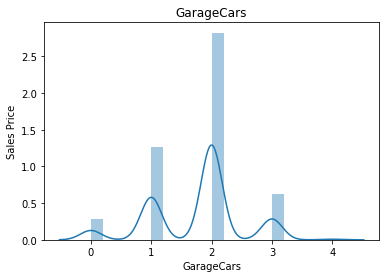

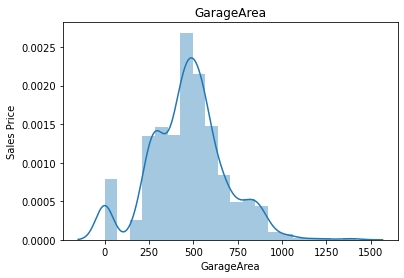

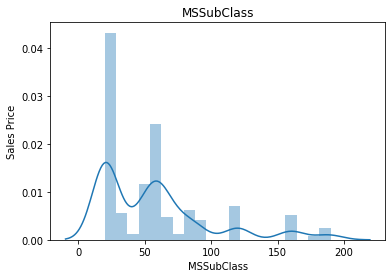

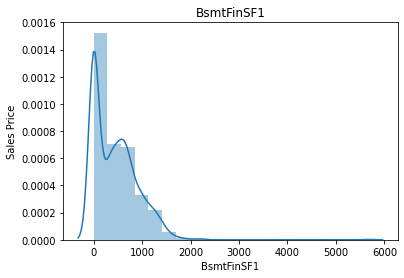

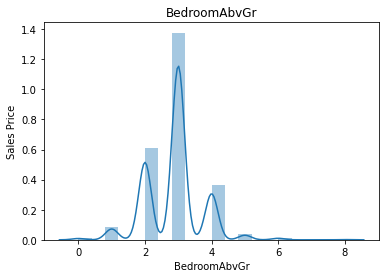

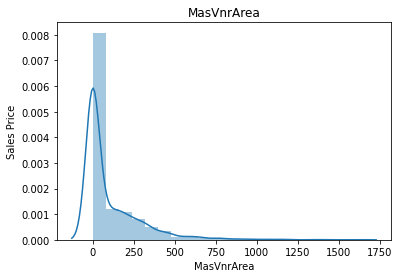

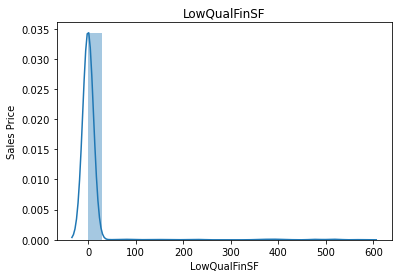

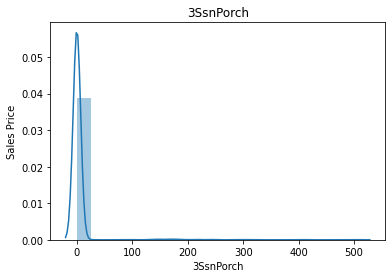

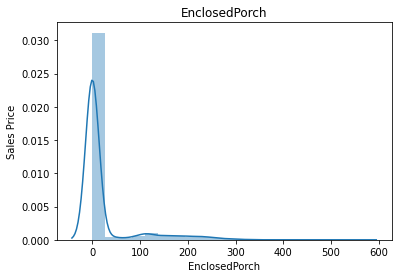

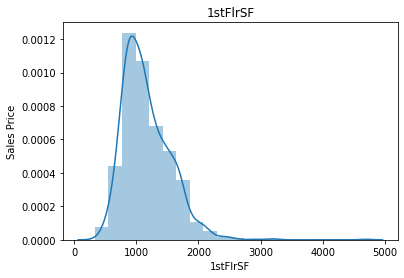

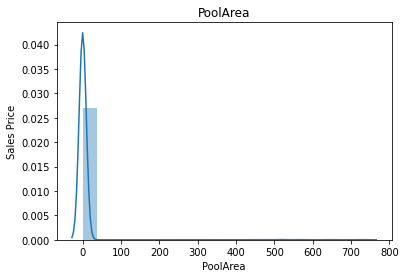

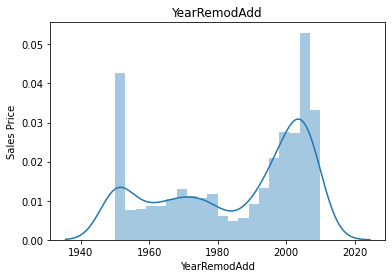

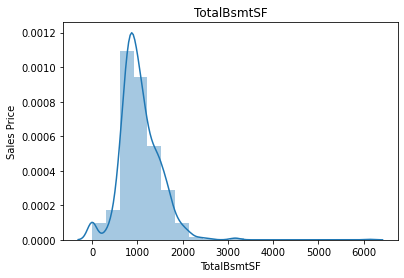

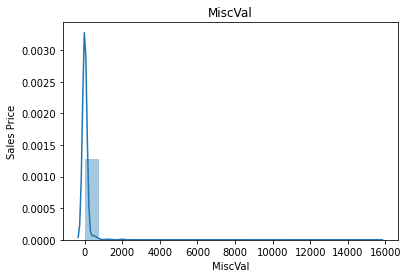

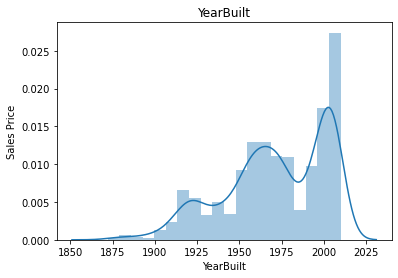

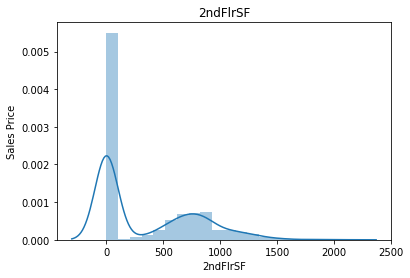

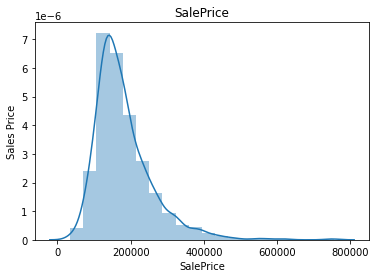

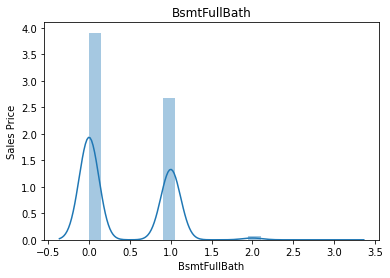

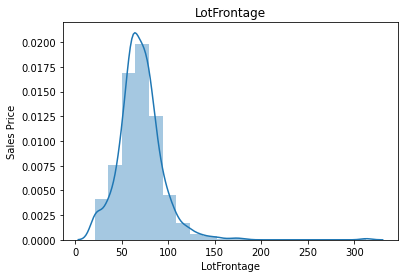

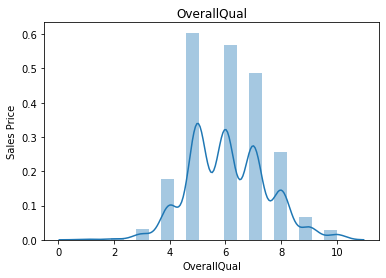

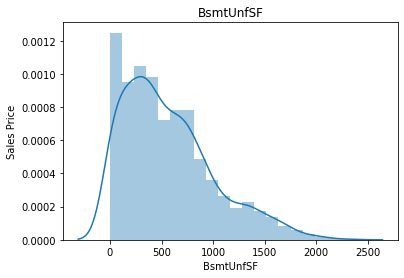

In [10]:
# Checking if numerical feature are in normally distributed or not, 
# Also Analysis the data
for feature in numerical_feature:
    if feature != 'Id':
        data = train.copy()
        sns.distplot(data[feature], bins=20)
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.title(feature)
        plt.show()

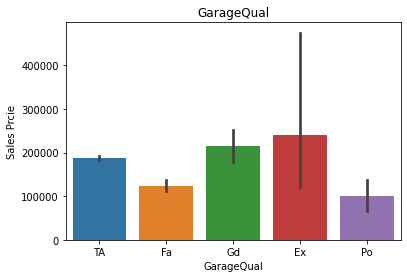

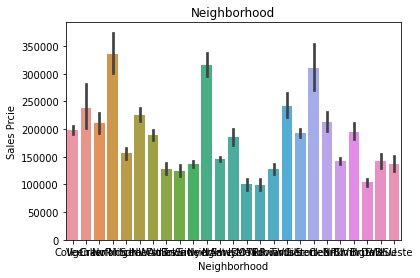

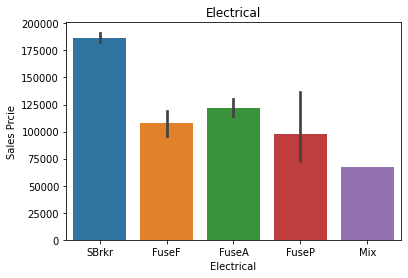

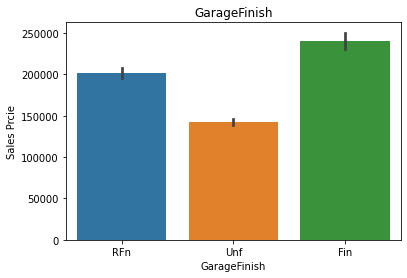

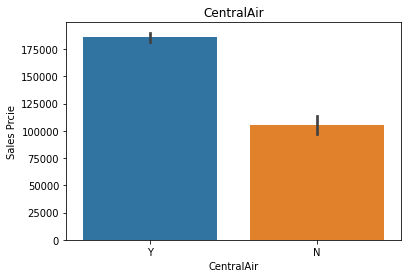

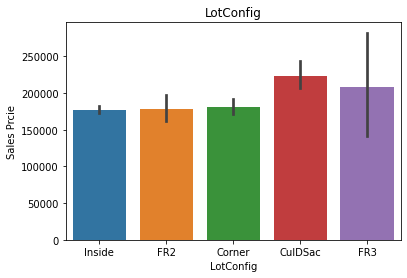

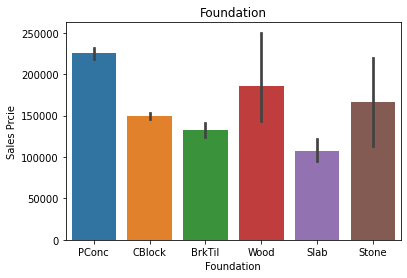

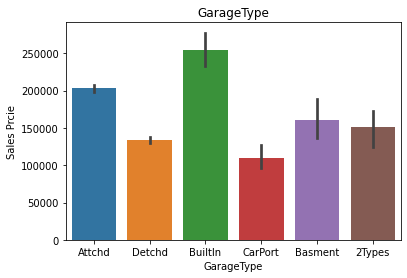

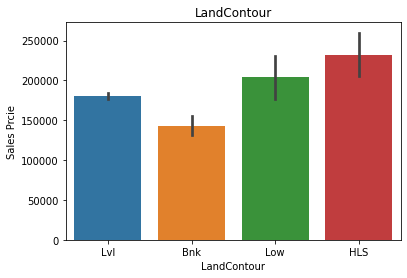

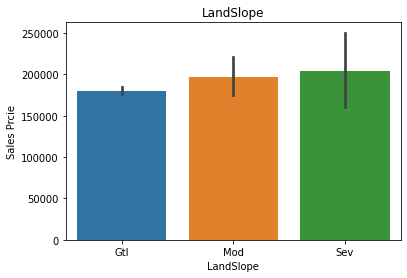

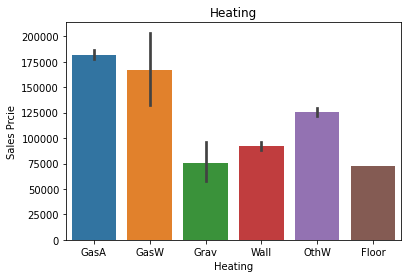

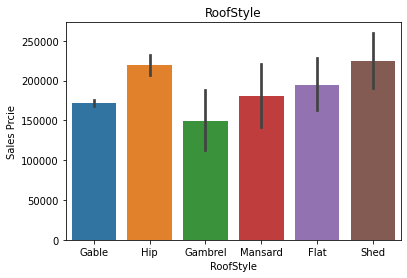

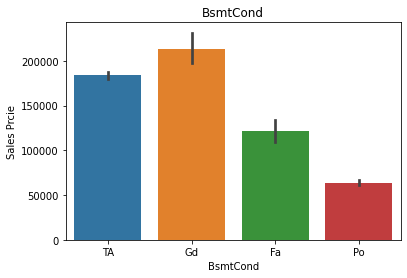

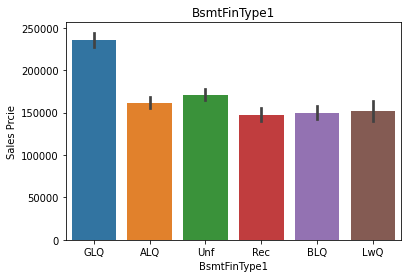

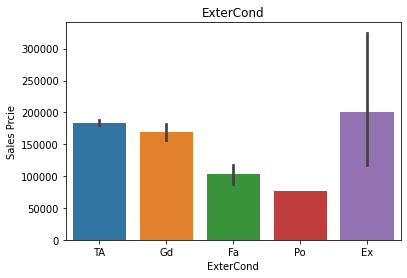

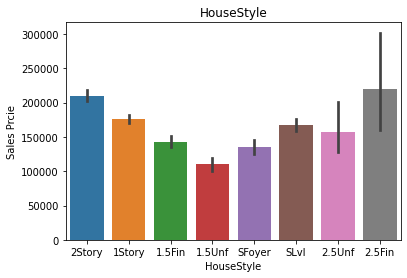

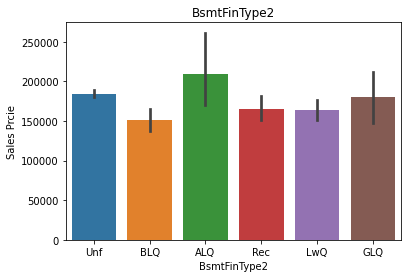

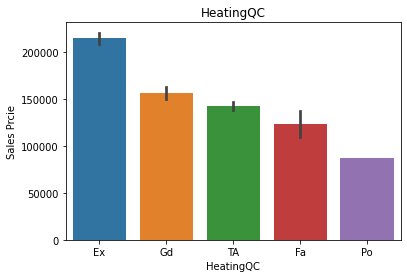

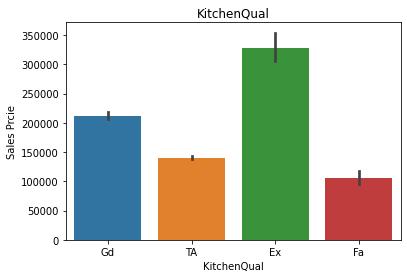

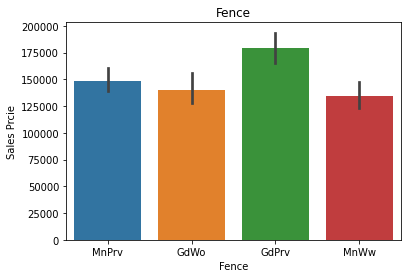

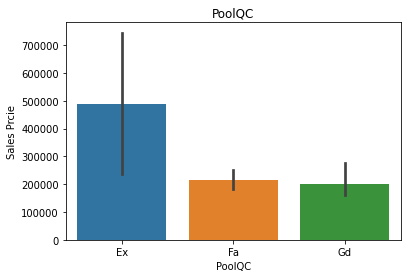

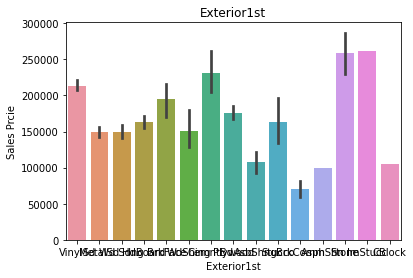

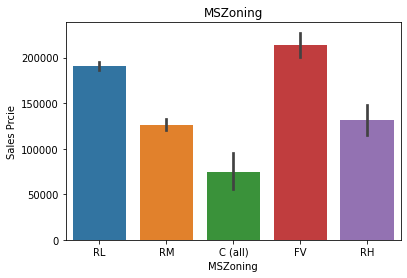

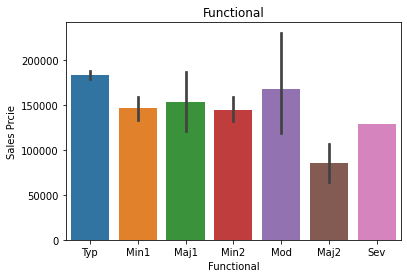

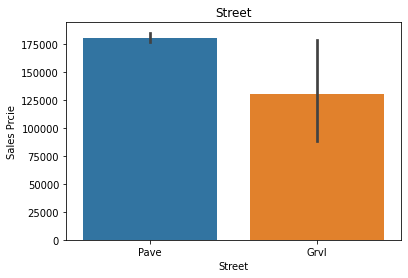

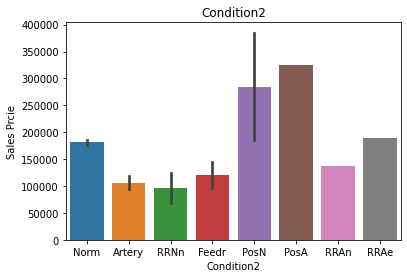

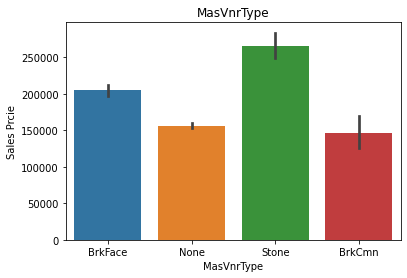

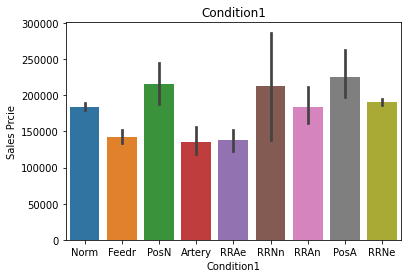

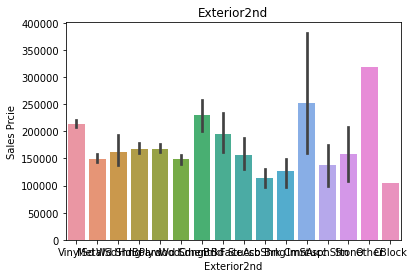

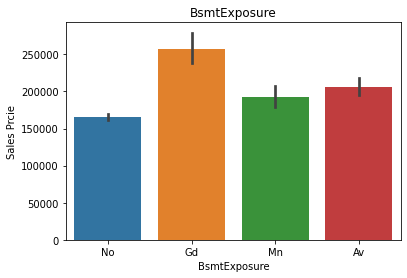

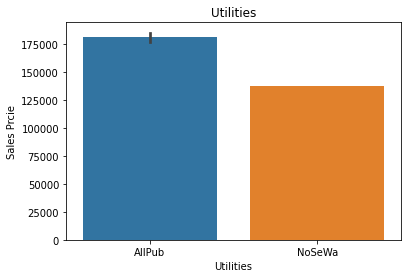

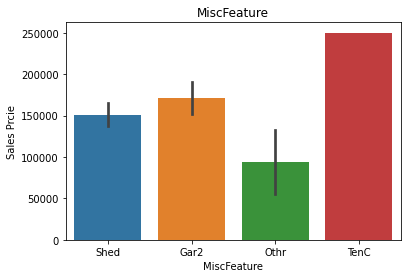

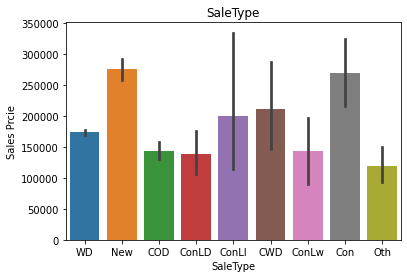

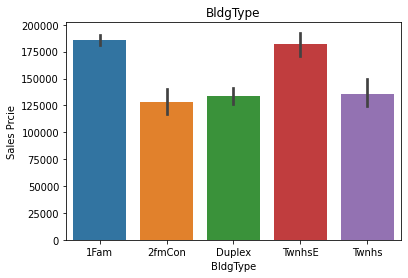

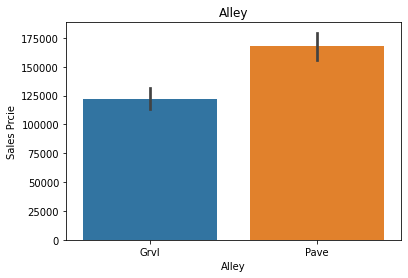

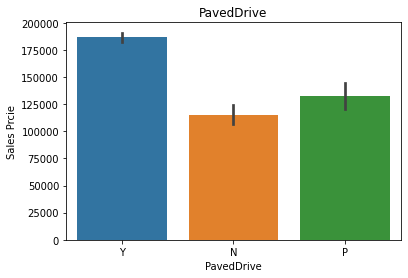

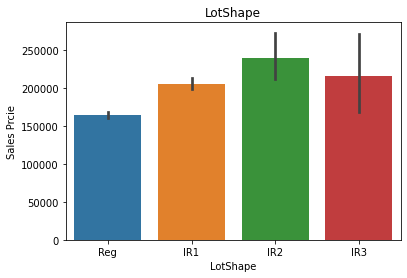

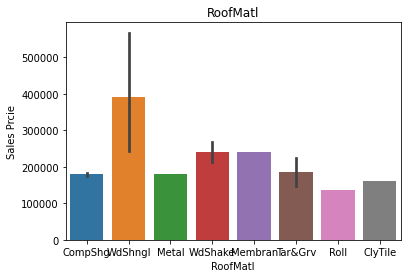

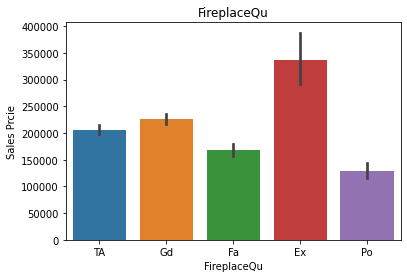

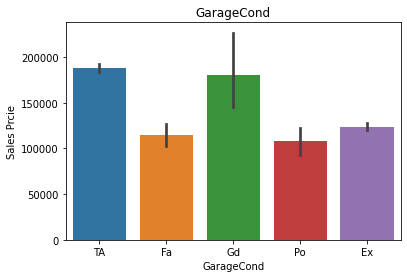

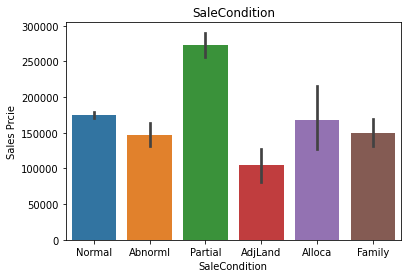

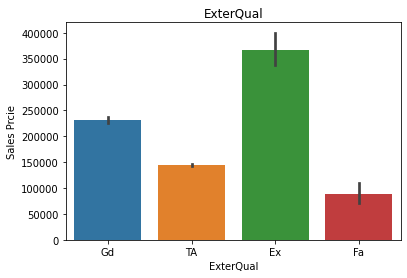

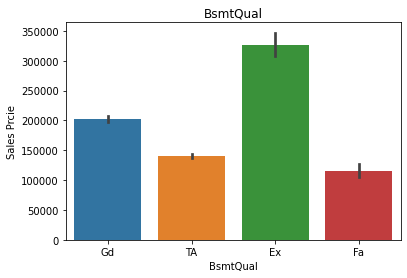

In [11]:
# plot the categorical feature And analysis the feature
for feature in categorical_feature:
    data = train.copy()
    sns.barplot(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Sales Prcie')
    plt.title(feature)
    plt.show()

#### Correlation of discrete feature:

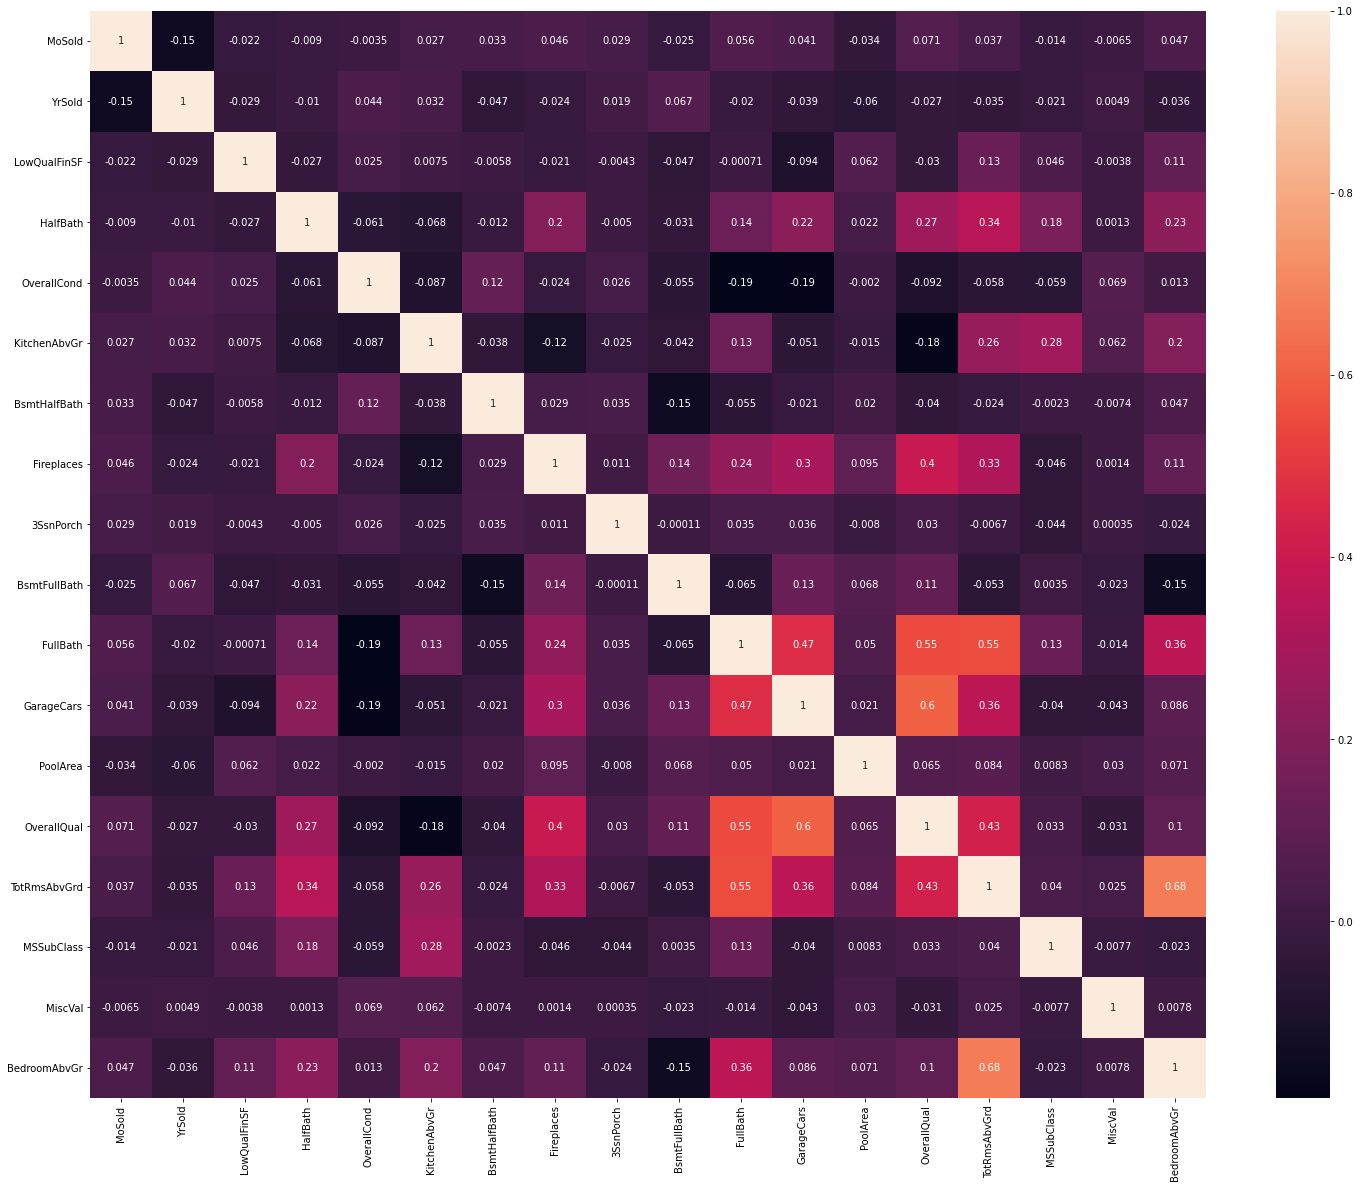

In [12]:
# Finds the correlation between the dependent and independent feature 
plt.figure(figsize=(25,20))
sns.heatmap(train[discrete_feature].corr(), annot=True)
plt.show()

#### Correlation of Continuous feature:

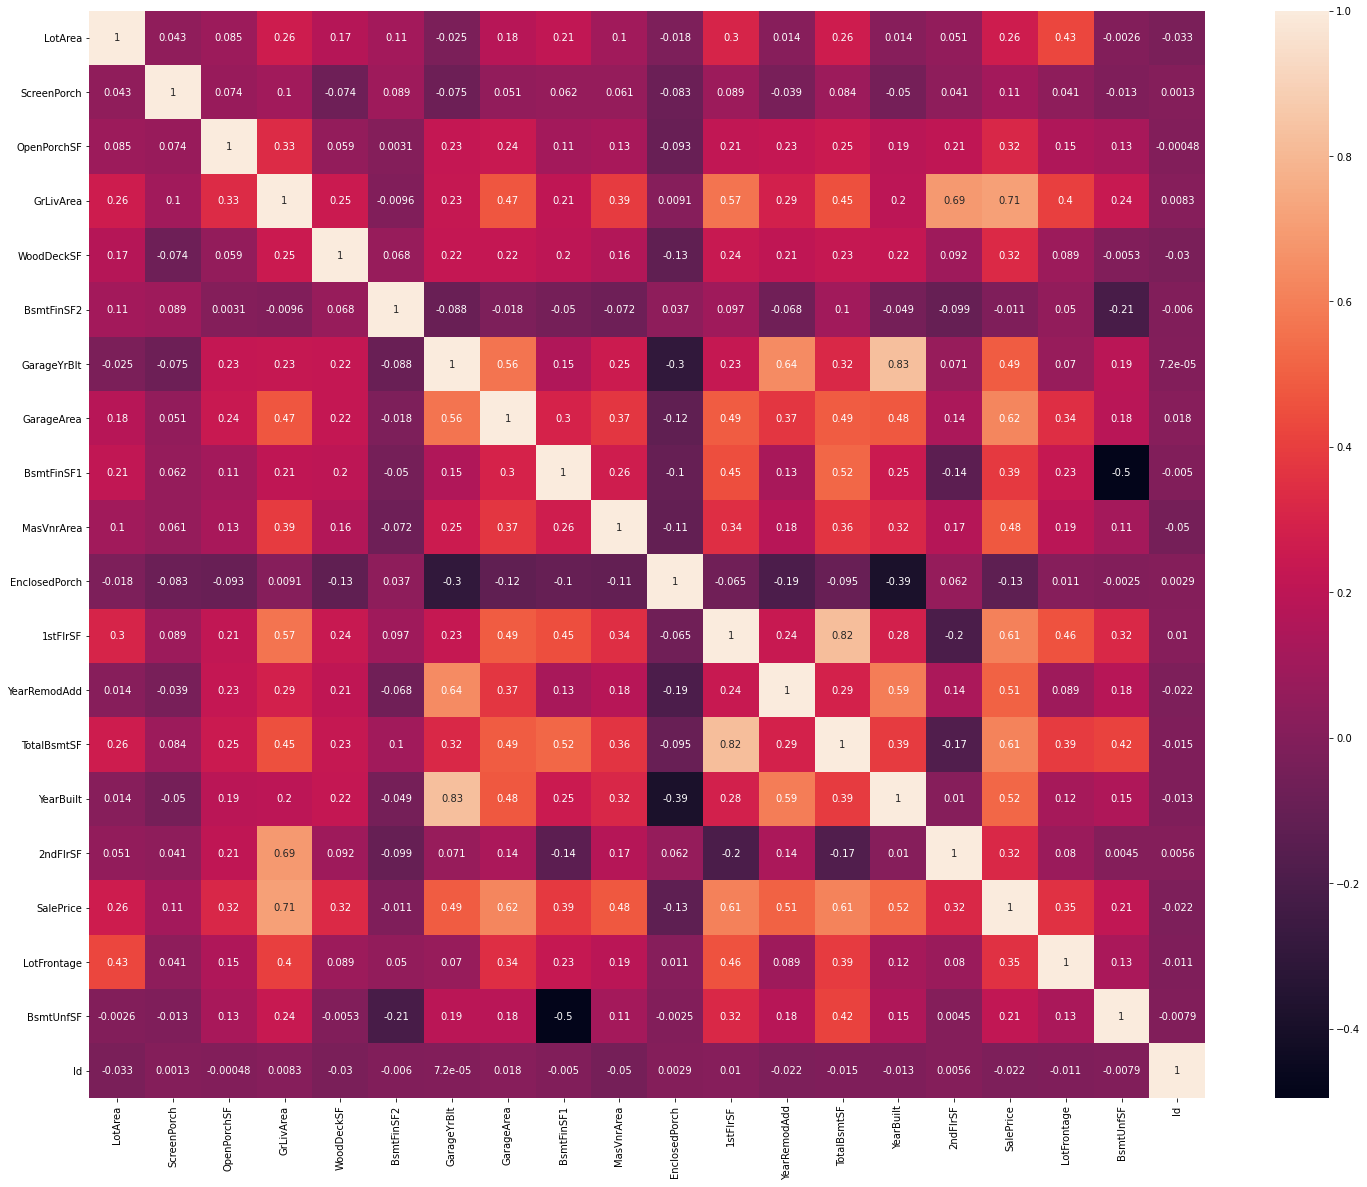

In [13]:
plt.figure(figsize=(25,20))
sns.heatmap(train[continuous_feature].corr(),annot=True)
plt.show()

#### STEP 2: FEATURE ENGINEERING

In [14]:
# checking if data has how many null values
for feature in train.columns:
    if feature != 'Id':
        print(f"{feature} : {np.round(train[feature].isnull().mean(),2)}")

MSSubClass : 0.0
MSZoning : 0.0
LotFrontage : 0.18
LotArea : 0.0
Street : 0.0
Alley : 0.94
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
OverallQual : 0.0
OverallCond : 0.0
YearBuilt : 0.0
YearRemodAdd : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.01
MasVnrArea : 0.01
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 0.03
BsmtCond : 0.03
BsmtExposure : 0.03
BsmtFinType1 : 0.03
BsmtFinSF1 : 0.0
BsmtFinType2 : 0.03
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0
1stFlrSF : 0.0
2ndFlrSF : 0.0
LowQualFinSF : 0.0
GrLivArea : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 0.0
KitchenAbvGr : 0.0
KitchenQual : 0.0
TotRmsAbvGrd : 0.0
Functional : 0.0
Fireplaces : 0.0
FireplaceQu : 0.47
GarageType : 0.06
GarageYrBlt : 0.0

#### Data Cleaning:

##### Numerical feature contains null values Replace with median

In [15]:
for feature in numerical_feature:
    train[feature] = train[feature].fillna(train[feature].median())

##### Categorical feature contains null values Replace with string value 'Missing'
      Bcoz missing categorical feature contains higher counts in unique label

In [16]:
for feature in categorical_feature:
    train[feature] = train[feature].fillna("Missing")

In [17]:
train.isnull().sum().sum()

0

       Here we saw that every null values has been replaced with particular values.After the data cleaning processs we need to convert the categorical feature into numerical feature

#### Encoding the Categorical Data:

##### Convert Categorical data into numerical data by using LabelEncoding

In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [19]:
LE = LabelEncoder()
for feature in categorical_feature:
    train[feature] = LE.fit_transform(train[feature])

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,3,2,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,2,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,2,1,0,12,2008,8,4,250000


##### Checking if dataset contains outliers:

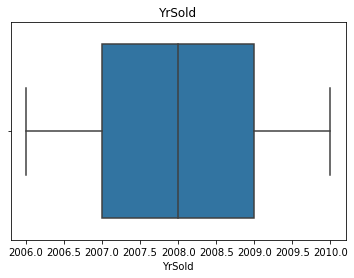

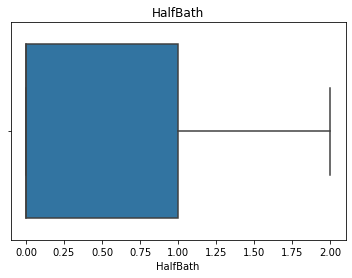

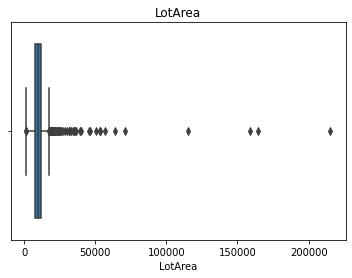

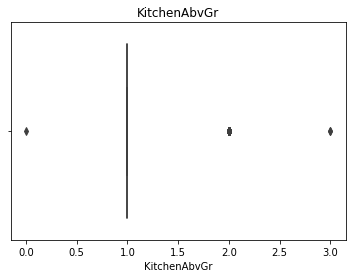

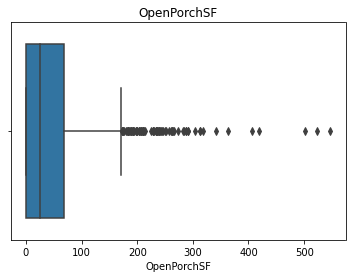

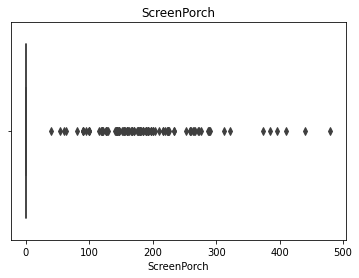

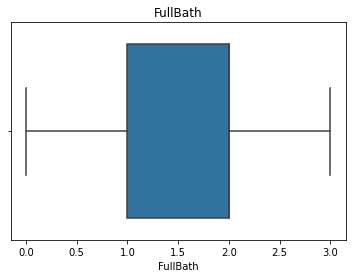

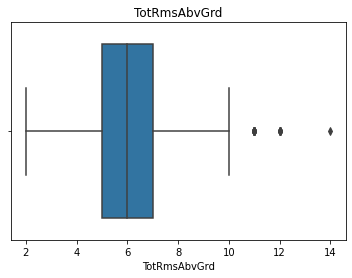

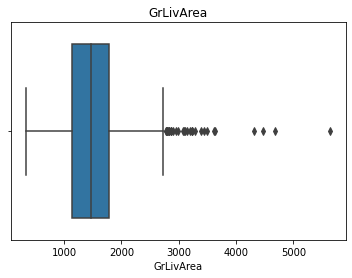

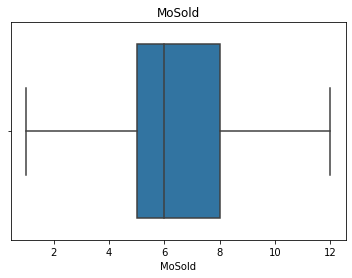

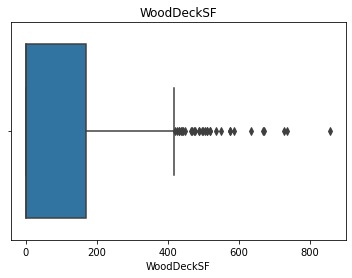

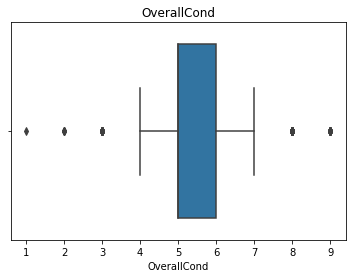

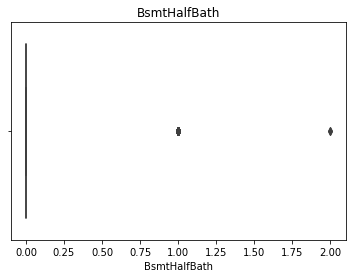

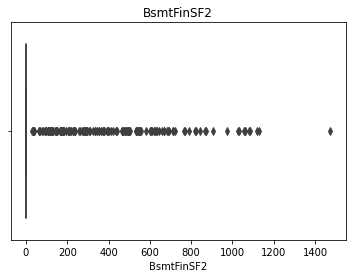

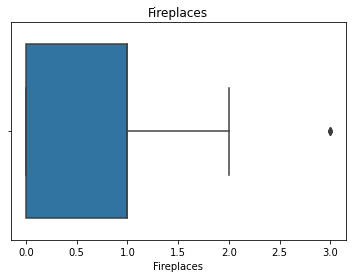

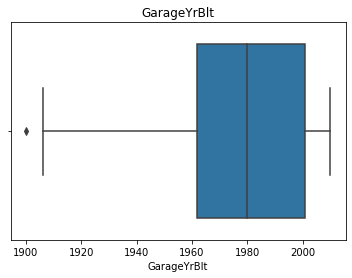

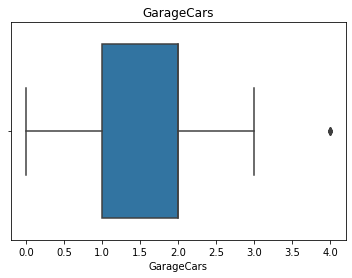

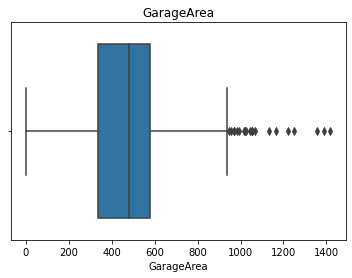

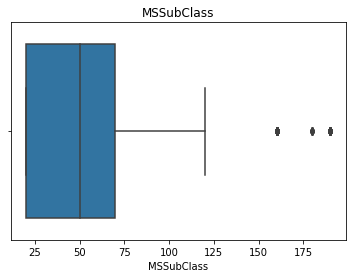

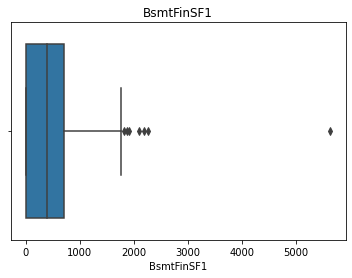

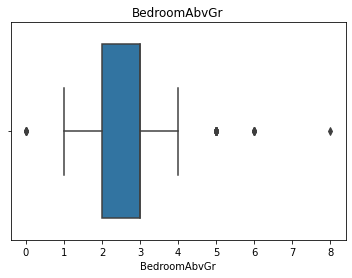

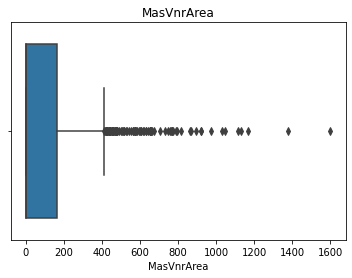

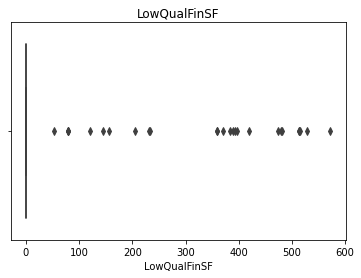

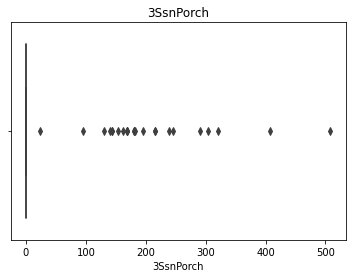

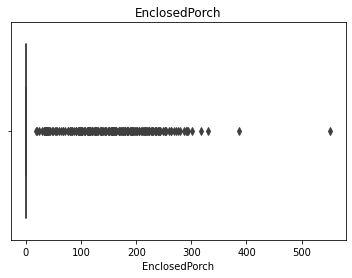

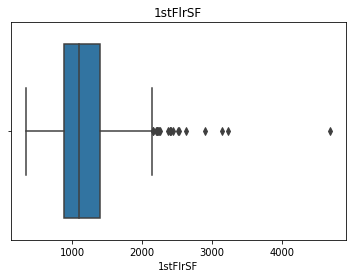

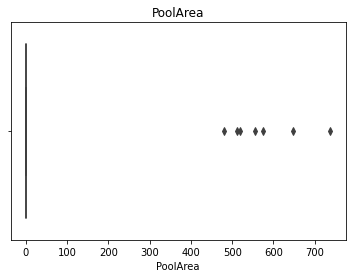

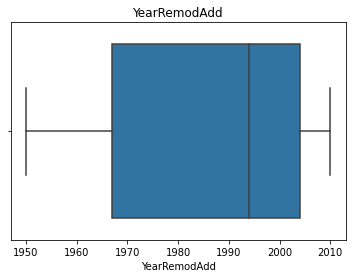

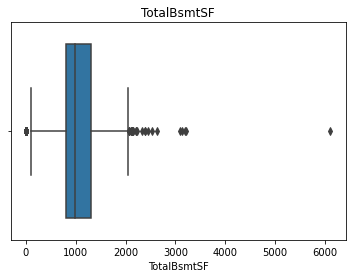

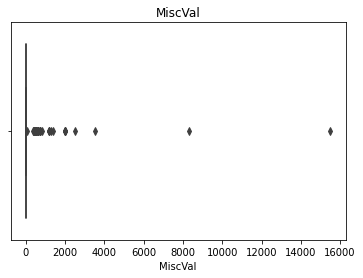

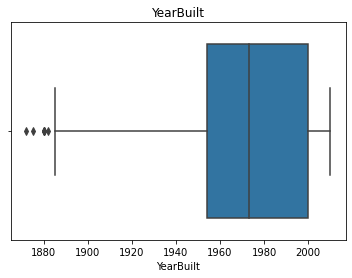

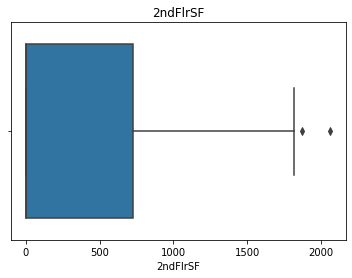

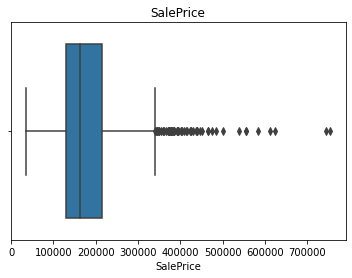

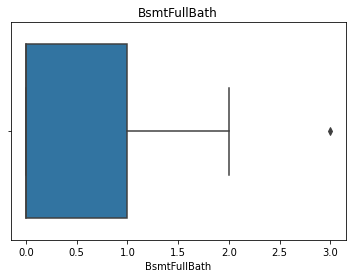

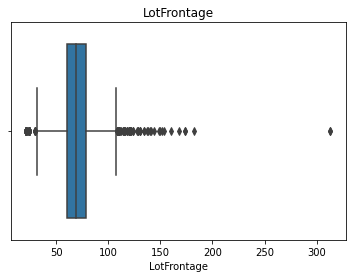

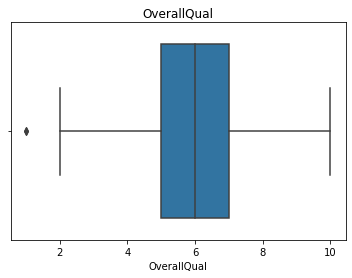

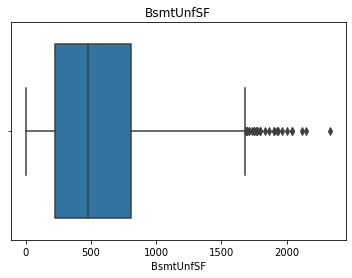

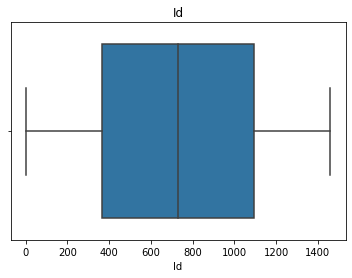

In [21]:
for feature in numerical_feature:
    data = train.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.show()

      In this case, there are many outlier in our dataset but iam using Ensemble methods so outliers are not sensitive to these kind of algorithms

##### **Perform Lognormal distribution for the Numerical values which are not Normal distributed**

In [22]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train[feature]=np.log(train[feature])

In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,8,4,12.247694
1,2,20,3,4.382027,9.169518,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,8,4,12.109011
2,3,60,3,4.219508,9.328123,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,3,2,486,6,0,434,920,1,0,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,8,4,12.317167
3,4,70,3,4.094345,9.164296,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,2,1,0,2,2006,8,0,11.849398
4,5,60,3,4.430817,9.565214,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,2,1,0,12,2008,8,4,12.429216


#### STEP 3: FEATURE SCALING
      In this dataset, there is no need of negative value so we use the MinMaxScaler methods to perform the feature scaling in the form of 0 to 1 

In [24]:
train.drop(['Id'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,4.174387,9.041922,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,8,4,12.247694
1,20,3,4.382027,9.169518,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,8,4,12.109011
2,60,3,4.219508,9.328123,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,3,2,486,6,0,434,920,1,0,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,8,4,12.317167
3,70,3,4.094345,9.164296,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,2,1,0,2,2006,8,0,11.849398
4,60,3,4.430817,9.565214,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,2,1,0,12,2008,8,4,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,4.127134,8.976768,1,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,3,0.0,3,4,2,2,4,4,6,0,6,0,953,953,1,0,1,5,6.859615,694,0,7.406711,0,0,2,1,3,1,3,7,6,1,5,1,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,3,2,1,0,8,2007,8,4,12.072541
1456,20,3,4.442651,9.486076,1,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,4,119.0,3,4,1,2,4,4,0,790,5,163,589,1542,1,4,1,5,7.636752,0,0,7.636752,1,0,2,0,3,1,3,7,2,2,5,1,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,3,3,1,0,2,2010,8,4,12.254863
1457,70,3,4.189655,9.109636,1,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,3,0.0,0,2,4,4,1,4,2,275,6,0,877,1152,1,0,1,5,7.080026,1152,0,7.757906,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,3,0,3,2500,5,2010,8,4,12.493130
1458,20,3,4.219508,9.181632,1,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,3,0.0,3,4,1,4,4,3,2,49,5,1029,0,1078,1,2,1,0,6.982863,0,0,6.982863,1,0,1,0,2,1,2,5,6,0,3,1,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,3,2,1,0,4,2010,8,4,11.864462


In [25]:
X_train = train.drop(['Id','SalePrice'],axis=1)
y_train = train[['SalePrice']]

In [26]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,4.174387,9.041922,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,8,4
1,20,3,4.382027,9.169518,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,8,4
2,60,3,4.219508,9.328123,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,3,2,486,6,0,434,920,1,0,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,8,4
3,70,3,4.094345,9.164296,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,2,1,0,2,2006,8,0
4,60,3,4.430817,9.565214,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,2,1,0,12,2008,8,4


In [27]:
Scaler = MinMaxScaler(feature_range=(0,1))
X_train = Scaler.fit_transform(X_train)

In [28]:
X_train

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 1.        ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 1.        ,
        0.8       ]])

In [29]:
y_train.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


#### Apply those methods into test dataset also

In [30]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [31]:
test['SalePrice'] = submission.SalePrice

In [32]:
numerical_feature = {feature for feature in test.columns if test[feature].dtypes != 'O'}
print(f"Count : {len(numerical_feature)}")
print(f"Numerical features are : {numerical_feature}")

Count : 38
Numerical features are : {'YrSold', 'HalfBath', 'LotArea', 'KitchenAbvGr', 'OpenPorchSF', 'ScreenPorch', 'FullBath', 'TotRmsAbvGrd', 'GrLivArea', 'MoSold', 'WoodDeckSF', 'OverallCond', 'BsmtHalfBath', 'BsmtFinSF2', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSSubClass', 'BsmtFinSF1', 'BedroomAbvGr', 'MasVnrArea', 'LowQualFinSF', '3SsnPorch', 'EnclosedPorch', '1stFlrSF', 'PoolArea', 'YearRemodAdd', 'TotalBsmtSF', 'MiscVal', 'YearBuilt', '2ndFlrSF', 'SalePrice', 'BsmtFullBath', 'LotFrontage', 'OverallQual', 'BsmtUnfSF', 'Id'}


In [33]:
for feature in numerical_feature:
    test[feature] = test[feature].fillna(test[feature].median())

In [34]:
categorical_feature = {feature for feature in test.columns if feature not in numerical_feature}
print(f"Count : {len(categorical_feature)}")
print(f"Categorical features are : {categorical_feature}")

Count : 43
Categorical features are : {'GarageQual', 'Neighborhood', 'Electrical', 'GarageFinish', 'CentralAir', 'LotConfig', 'Foundation', 'GarageType', 'LandContour', 'LandSlope', 'Heating', 'RoofStyle', 'BsmtCond', 'BsmtFinType1', 'ExterCond', 'HouseStyle', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Fence', 'PoolQC', 'Exterior1st', 'MSZoning', 'Functional', 'Street', 'Condition2', 'MasVnrType', 'Condition1', 'Exterior2nd', 'BsmtExposure', 'Utilities', 'MiscFeature', 'SaleType', 'BldgType', 'Alley', 'PavedDrive', 'LotShape', 'RoofMatl', 'FireplaceQu', 'GarageCond', 'SaleCondition', 'ExterQual', 'BsmtQual'}


In [35]:
for feature in categorical_feature:
    test[feature] = test[feature].fillna("Missing")

In [36]:
for feature in categorical_feature:
    test[feature] = LE.fit_transform(test[feature])

In [37]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    test[feature]=np.log(test[feature])

In [38]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,3,4.382027,9.360655,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,11,13,3,0.0,3,4,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,7,0,3,1,1961.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,3,1,0,6,2010,9,4,12.039292
1,1462,20,4,4.394449,9.565704,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,12,14,1,108.0,3,4,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,3,1,1958.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,2,0,12500,6,2010,9,4,12.142911
2,1463,60,4,4.304065,9.534595,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,11,13,3,0.0,3,4,2,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,7,1,5,1,1997.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,3,1,0,3,2010,9,4,12.120426
3,1464,60,4,4.356709,9.208138,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,11,13,1,20.0,3,4,2,4,4,4,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,7,1,2,1,1998.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,2,1,0,6,2010,9,4,12.096913
4,1465,120,4,3.761200,8.518193,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,3,0.0,2,4,2,2,4,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,7,0,3,1,1992.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,2,1,0,1,2010,9,4,11.923246


In [39]:
X_test = test.drop(['Id','SalePrice'],axis=1)
y_test = test[['SalePrice']]

#### STEP 4: HYPERPARAMETER TUNNING

In [40]:
# Instantiate a dict (+function) for storing model scores
scores = {}
def get_cv_score(estimator):
    return np.sqrt(-1 * cross_val_score(estimator, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1))

In [41]:
# Start with LinearRegressor Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

scores['linear_regression'] = get_cv_score(lin_reg)

In [42]:
# Random Forest
RFR = RandomForestRegressor(n_estimators=250, 
                                max_depth=15, 
                                min_samples_leaf=5, 
                                min_samples_split=5, 
                                n_jobs=-1,
                               random_state=42)
scores['RFR'] = get_cv_score(RFR)

# Gradient Boosting
GBR = GradientBoostingRegressor(n_estimators=350, 
                                    learning_rate=0.1, 
                                    loss='huber',
                                   random_state=42)
scores['GBR'] = get_cv_score(GBR)

# LGBMRegressor
LGBMR = LGBMRegressor(objective='regression',
                        n_estimators=300,
                        learning_rate=0.1,
                        random_state=42)
scores['LGBMR'] = get_cv_score(LGBMR)

In [45]:
# XGBoost
XGBR = XGBRegressor(n_estimators=300,
                      max_depth=5, 
                      learning_rate=0.1,
                      random_state=42)
scores['XGBR'] = get_cv_score(XGBR)

# Evaluate models before any serious Hyperparameter tuning
print(f"LRegressor: {scores['linear_regression'].mean()}")
print(f"LGBM: {scores['LGBMR'].mean()}")
print(f"GradientBoosting: {scores['GBR'].mean()}")
print(f"RandomForest: {scores['RFR'].mean()}")
print(f"XGBoost: {scores['XGBR'].mean()}")

In [47]:
# Light Gradient Boosting Regressor
lGBMR = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [48]:
# XGBoost Regressor
XGBR = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [49]:

# Gradient Boosting Regressor
GBR = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

In [50]:
# Random Forest Regressor
RFR = RandomForestRegressor(n_estimators=2200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [51]:
# Support Vector Regressor
Svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingRegressor(estimators=[
                                ('xgboost',XGBR), 
                                ('lightgbm',LGBMR),   
                                ('gbr',GBR), 
                                ('rfr',RFR),
                                ('lReg',lin_reg),
                                ('SVR', Svr)],
                                final_estimator=XGBR,
                                n_jobs=-1)


We make use of a StackingRegressor which takes collection of models and aggregates their predictions by having a meta-learner treat it as independent variables and the true values as the targets. This is another form of Ensembling.

#### STEP 4: FIT INTO MODEL

In [55]:
LGBMR.fit(X_train, y_train)

LGBMRegressor(n_estimators=300, objective='regression', random_state=42)

In [56]:
XGBR.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=6000, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=42, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [57]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=6000,
                          random_state=42)

In [58]:
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=2200, oob_score=True,
                      random_state=42)

In [59]:
# SVR algorithm
Svr.fit(X_train, y_train)

SVR(C=20, epsilon=0.008, gamma=0.0003)

In [60]:
stack_gen.fit(X_train, y_train)

StackingRegressor(estimators=[('xgboost',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7, gamma=0.6,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=4,
                                            min_child_weight=0, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=6000, n_jobs=4,
                                            nt...
                                               importance_type='gain',
                                          

In [61]:
def predictions(X_test):
    return ((0.1 * Svr.predict(X_test)) + \
            (0.2 * GBR.predict(X_test)) + \
            (0.2 * XGBR.predict(X_test)) + \
            (0.1 * LGBMR.predict(X_test)) + \
            (0.05 * RFR.predict(X_test)) + \
            (0.35 * stack_gen.predict(X_test)))

In [62]:
predictions(X_test)

array([12.5767539 , 12.50891591, 12.6171468 , ..., 12.59381052,
       12.44028875, 12.5821239 ])

In [63]:
# Get the submission file ready, Remember to invert the log transform we applied earlier
submission = pd.read_csv("submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(predictions(X_test)))

submission.to_csv("submission_regression_1.csv", index=False)